<a href="https://colab.research.google.com/github/Atikahdr/DiabetesData/blob/main/DiabetesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 124.7 MB/s eta 0:00:00


In [ ]:
import streamlit as st
print(st.__version__)

1.50.0


In [ ]:
import numpy as np
print(np.__version__)

2.0.2


# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pickle
import os
warnings.filterwarnings('ignore')

# 2. Connect G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/Data Science - Digitalskola/FinalProject/Multiclass Diabetes Dataset.csv")
diabetes_data.tail(10)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
254,1,52,7.8,315,7.7,3.5,1.3,1.0,1.6,1.4,33.0,2
255,1,53,14.9,327,11.0,5.9,8.7,1.0,3.0,3.4,33.0,2
256,1,57,4.6,370,6.8,4.0,6.0,2.5,3.5,1.1,37.0,2
257,1,57,4.6,370,6.8,6.1,6.0,2.5,3.5,1.1,37.0,2
258,0,55,24.0,401,6.3,4.3,2.9,0.4,2.7,1.3,28.0,2
259,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0,2
260,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6,2
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,2
263,1,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,2


In [ ]:
diabetes_data.shape

(264, 12)

In [ ]:
diabetes_data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


# 3. Cleaning Data

In [ ]:
# Cek data Null
diabetes_data.isnull().sum()

,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0
LDL,0
VLDL,0


In [ ]:
# Menampilkan semua baris yang punya duplikat
duplicates_all = diabetes_data[diabetes_data.duplicated(keep=False)]
print(duplicates_all)
print("Jumlah data duplikat:", diabetes_data.duplicated().sum())

Empty DataFrame
Columns: [Gender, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI, Class]
Index: []
Jumlah data duplikat: 0


## Cr (Creatinine) - Normal: ±0.6–1.3 mg/dL.


Jika dilihat Statistik deskriptif Cr dari dataset:

* mean = 85.8
* median (50%) = 61
* min = 6
* max = 800

Sementara nilai normal Cr:

* Normal (mg/dL): 0.6 – 1.3 mg/dL

* Bahkan pada gagal ginjal berat biasanya hanya naik sampai ±15–20 mg/dL

Angka >100 mg/dL sangat tidak masuk akal untuk hasil lab manusia

Jadi kemungkinan besar:

* Satuan salah → Data Cr mungkin dicatat dalam µmol/L (micromole per liter), bukan mg/dL.

* Kesalahan input → Kalau dataset asli memang ditulis "mg/dL" tapi angkanya di range ratusan, berarti ada kemungkinan salah label satuan.

* **Konversi µmol/L → mg/dL: Cr (mg/dL) = Cr (µmol/L) / 88.4**

-Asal angka 88.4 pada konversi Creatinine

In [ ]:
# Simpan data asli
diabetes_data_clean = diabetes_data.copy()

# Ubah type CR menjadi float
diabetes_data_clean ["Cr"] = diabetes_data_clean ["Cr"].astype(float)

# Konversi Cr dari µmol/L ke mg/dL
diabetes_data_clean ["Cr"] = (diabetes_data_clean ["Cr"] / 88.4).round(1)

# Cek hasil
diabetes_data_clean.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,0.5,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,0.7,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,0.5,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,0.3,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,0.6,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


## Chol (Cholesterol) - Normal: <200 mg/dL.

Kolesterol (Chol) masih dalam bentuk float (kisaran 0–9). Dari keterangan normalnya <200 mg/dL, berarti datanya kemungkinan besar masih dalam mmol/L (satuan internasional).

Rumus konversi kolesterol:
* mg/dL = mmol/L × 38.67


Jadi kalau misalnya Chol = 4.5 mmol/L → 4.5 × 38.67 ≈ 174 mg/dL (masuk kategori normal).

In [ ]:
# Konversi Cholesterol dari mmol/L ke mg/dL
diabetes_data_clean["Chol"] = (diabetes_data_clean["Chol"] * 38.67).round()

In [ ]:
# Cek jumlah data Chol = 0
zero_chol = diabetes_data_clean[diabetes_data_clean['Chol'] == 0]
print("Jumlah data dengan Chol = 0:", zero_chol.shape[0])

Jumlah data dengan Chol = 0: 1


Secara medis, Chol (Kolesterol) tidak mungkin 0 mg/dL → itu jelas error input.

cuma ada 1 baris error dari total 264 → sangat kecil (≈0.4%)

Hapus baris (drop) karena cuma 1 baris (tidak pengaruh ke distribusi).

In [ ]:
outlier_chol = diabetes_data_clean[diabetes_data_clean["Chol"] <= 80]
print(outlier_chol)

# Hitung jumlah outlier Chol < 80
outlier_count = diabetes_data_clean[diabetes_data_clean["Chol"] <= 80].shape[0]

# Hitung persentase
total_count = diabetes_data_clean.shape[0]
percentage = (outlier_count / total_count) * 100

print("Jumlah data setelah drop:", len(diabetes_data_clean))
print(f"Jumlah data outlier Chol < 80 : {outlier_count}")
print(f"Persentase data yang akan di-drop: {percentage:.2f}%")


     Gender  AGE  Urea   Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Class
17        0   49  13.5  2.0    5.1  19.0  1.9  1.3  2.8   0.8  24.0      0
79        1   50   5.8  0.7    4.0  77.0  1.2  1.3  3.0   0.8  21.0      0
93        1   77   5.0  1.2    5.4   0.0  2.8  0.8  1.8   0.7  19.0      0
103       1   49   5.0  0.8    6.2  77.0  0.8  0.6  1.0   0.4  25.0      1
107       1   50   5.0  0.8    6.2  77.0  0.8  0.6  1.0   0.4  24.0      1
113       1   50   5.0  0.8    6.2  77.0  0.8  0.6  1.0   0.4  25.0      1
139       0   54   1.2  0.3    7.9  77.0  1.9  0.9  2.5   0.7  33.0      2
Jumlah data setelah drop: 264
Jumlah data outlier Chol < 80 : 7
Persentase data yang akan di-drop: 2.65%


In [ ]:
# Drop data dengan TG <= 80 langsung di dataframe utama
diabetes_data_clean.drop(diabetes_data_clean[diabetes_data_clean["Chol"] <= 80].index, inplace=True)

# Cek ukuran data setelah drop
print("Jumlah data setelah drop:", diabetes_data_clean.shape[0])

Jumlah data setelah drop: 257


In [ ]:
# Cek distribusi setelah konversi
print(diabetes_data_clean["Chol"].describe())

count    257.000000
mean     180.894942
std       46.099339
min       81.000000
25%      151.000000
50%      174.000000
75%      205.000000
max      367.000000
Name: Chol, dtype: float64


## TG (Triglycerides) - Normal: <150 mg/dL.

Jumlah TG (Trigliserida) (mg/dL). Kadar tinggi berhubungan dengan resistensi insulin dan sindrom metabolik. Normal: <150 mg/dL.
* kolom TG (Trigliserida) yang ada di dataset saat ini masih dalam satuan mmol/L,
* Konversi kedalam mg/dL:
  * TG (mg/dL)=TG (mmol/L)×88.57

In [ ]:
# Konversi Trigliserida (TG) dari mmol/L ke mg/dL
diabetes_data_clean["TG"] = (diabetes_data_clean["TG"] * 88.57).round()

# Cek distribusi setelah konversi
print(diabetes_data_clean["TG"].describe())

count    257.000000
mean     192.256809
std      112.712664
min       53.000000
25%      115.000000
50%      159.000000
75%      248.000000
max      771.000000
Name: TG, dtype: float64


TG Max: 771 mg/dL → ada outlier, masuk kategori very high.
* Nilai ekstrem (misalnya 771) masih mungkin secara klinis, terutama pada pasien diabetes/hiperlipidemia berat.

In [ ]:
outlier_tg = diabetes_data_clean[diabetes_data_clean["TG"] > 500]
print(outlier_tg)

     Gender  AGE  Urea   Cr  HbA1c   Chol     TG  HDL  LDL  VLDL   BMI  Class
58        0   35   3.9  0.4    5.4  147.0  523.0  0.5  4.3   1.0  22.0      0
85        1   50   9.6  2.3    5.4  147.0  523.0  0.5  4.3   1.3  22.0      0
255       1   53  14.9  3.7   11.0  228.0  771.0  1.0  3.0   3.4  33.0      2
256       1   57   4.6  4.2    6.8  155.0  531.0  2.5  3.5   1.1  37.0      2
257       1   57   4.6  4.2    6.8  236.0  531.0  2.5  3.5   1.1  37.0      2


## HDL (High-Density Lipoprotein)

HDL masih dalam mmol/L, makaharus dikonversi ke mg/dL.

* **Ideal: >40 mg/dL (pria), >50 mg/dL (wanita).**

Konversinya sama seperti kolesterol total:

* **HDL (mg/dL)=HDL (mmol/L)×38.67**

In [ ]:
# Konversi HDL dari mmol/L ke mg/dL
diabetes_data_clean["HDL"] = (diabetes_data_clean["HDL"] * 38.67).round()

# Cek distribusi setelah konversi
print(diabetes_data_clean["HDL"].describe())

count    257.000000
mean      46.112840
std       17.638706
min       15.000000
25%       35.000000
50%       43.000000
75%       54.000000
max      155.000000
Name: HDL, dtype: float64


In [ ]:
outlier_hdl = diabetes_data_clean[diabetes_data_clean["HDL"] > 100]
print(outlier_hdl)

# Hitung jumlah outlier HDL >= 600
outlier_count = diabetes_data_clean[diabetes_data_clean["HDL"] > 100].shape[0]

# Hitung persentase
total_count = diabetes_data_clean.shape[0]
percentage = (outlier_count / total_count) * 100

print(f"Jumlah data outlier HDL > 100: {outlier_count}")
print(f"Persentase data yang akan di-drop: {percentage:.2f}%")


    Gender  AGE  Urea   Cr  HbA1c   Chol     TG    HDL  LDL  VLDL   BMI  Class
70       0   35   3.3  0.5    5.0  159.0  168.0  155.0  1.3   0.7  23.0      0
Jumlah data outlier HDL > 100: 1
Persentase data yang akan di-drop: 0.39%


In [ ]:
# Drop data dengan HDL > 100 langsung di dataframe utama
diabetes_data_clean.drop(diabetes_data_clean[diabetes_data_clean["HDL"] > 100].index, inplace=True)

# Cek ukuran data setelah drop
print("Jumlah data setelah drop:", diabetes_data_clean.shape[0])
print(diabetes_data_clean['HDL'].describe())

Jumlah data setelah drop: 256


## LDL (Low Density Lipoprotein)

Satuan di dataset masih mmol/L (makanya angkanya kecil, float).

Optimal: <100 mg/dL.

* Konversi ke mg/dL pakai faktor 38.67

  * **LDL (mg/dL)=LDL (mmol/L)×38.67**

In [ ]:
# Konversi LDL dari mmol/L ke mg/dL
diabetes_data_clean["LDL"] = (diabetes_data_clean["LDL"] * 38.67).round()

# Cek hasil statistik LDL setelah konversi
print(diabetes_data_clean["LDL"].describe())

count    256.000000
mean      98.753906
std       38.546305
min       12.000000
25%       70.000000
50%       97.000000
75%      128.000000
max      217.000000
Name: LDL, dtype: float64


In [ ]:
diabetes_data_clean.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,0.5,4.9,162.0,80.0,93.0,54.0,0.5,24.0,0
1,1,26,4.5,0.7,4.9,143.0,124.0,43.0,81.0,0.6,23.0,0
2,1,33,7.1,0.5,4.9,189.0,89.0,31.0,77.0,0.4,21.0,0
3,0,45,2.3,0.3,4.0,112.0,89.0,39.0,58.0,0.4,21.0,0
4,0,50,2.0,0.6,4.0,139.0,115.0,35.0,81.0,0.6,24.0,0


## VLDL (Very Low-Density Lipoprotein)
* Berdasarkan keterangkan, Dihitung dari TG/5.
* Normal: 2-30 mg/dL

In [ ]:
diabetes_data_clean['VLDL_check'] = diabetes_data_clean['TG'] / 5
print(diabetes_data_clean[['VLDL', 'VLDL_check']].head())

   VLDL  VLDL_check
0   0.5        16.0
1   0.6        24.8
2   0.4        17.8
3   0.4        17.8
4   0.6        23.0


In [ ]:
# Ganti kolom VLDL dengan VLDL_check
diabetes_data_clean['VLDL'] = diabetes_data_clean['VLDL_check']

# Hapus kolom VLDL_check jika tidak diperlukan
diabetes_data_clean.drop(columns=['VLDL_check'], inplace=True)

# Cek hasil statistik VDL setelah konversi
print(diabetes_data_clean["VLDL"].describe())

count    256.000000
mean      38.470312
std       22.584639
min       10.600000
25%       23.000000
50%       31.800000
75%       50.050000
max      154.200000
Name: VLDL, dtype: float64


## Sesuaikan kolom dengan kebutuhan nilai (ubah tipe data)

In [ ]:
# Kolom yang bisa aman jadi integer
int_columns = ["Chol", "TG", "HDL", "LDL"]

# Konversi ke integer
diabetes_data_clean[int_columns] = diabetes_data_clean[int_columns].astype(int)

In [ ]:
diabetes_data_clean.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,0.5,4.9,162,80,93,54,16.0,24.0,0
1,1,26,4.5,0.7,4.9,143,124,43,81,24.8,23.0,0
2,1,33,7.1,0.5,4.9,189,89,31,77,17.8,21.0,0
3,0,45,2.3,0.3,4.0,112,89,39,58,17.8,21.0,0
4,0,50,2.0,0.6,4.0,139,115,35,81,23.0,24.0,0


In [ ]:
diabetes_data_clean.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.542969,49.453125,5.677656,0.971094,6.897500,180.980469,192.351562,45.687500,98.753906,38.470312,26.701133,1.136719
std,0.499126,10.094735,4.022114,1.134393,2.569285,46.169207,112.923197,16.299284,38.546305,22.584639,5.110352,0.916547
min,0.000000,25.000000,1.100000,0.100000,0.900000,81.000000,53.000000,15.000000,12.000000,10.600000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,0.500000,5.000000,151.000000,115.000000,35.000000,70.000000,23.000000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,0.700000,6.100000,174.000000,159.000000,43.000000,97.000000,31.800000,25.000000,1.000000
75%,1.000000,56.000000,6.125000,0.900000,8.350000,205.000000,250.250000,54.000000,128.000000,50.050000,30.000000,2.000000
max,1.000000,77.000000,26.400000,9.000000,14.600000,367.000000,771.000000,97.000000,217.000000,154.200000,43.250000,2.000000


In [ ]:
diabetes_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  256 non-null    int64  
 1   AGE     256 non-null    int64  
 2   Urea    256 non-null    float64
 3   Cr      256 non-null    float64
 4   HbA1c   256 non-null    float64
 5   Chol    256 non-null    int64  
 6   TG      256 non-null    int64  
 7   HDL     256 non-null    int64  
 8   LDL     256 non-null    int64  
 9   VLDL    256 non-null    float64
 10  BMI     256 non-null    float64
 11  Class   256 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 26.0 KB


# 4. Exploratory Data Analysis

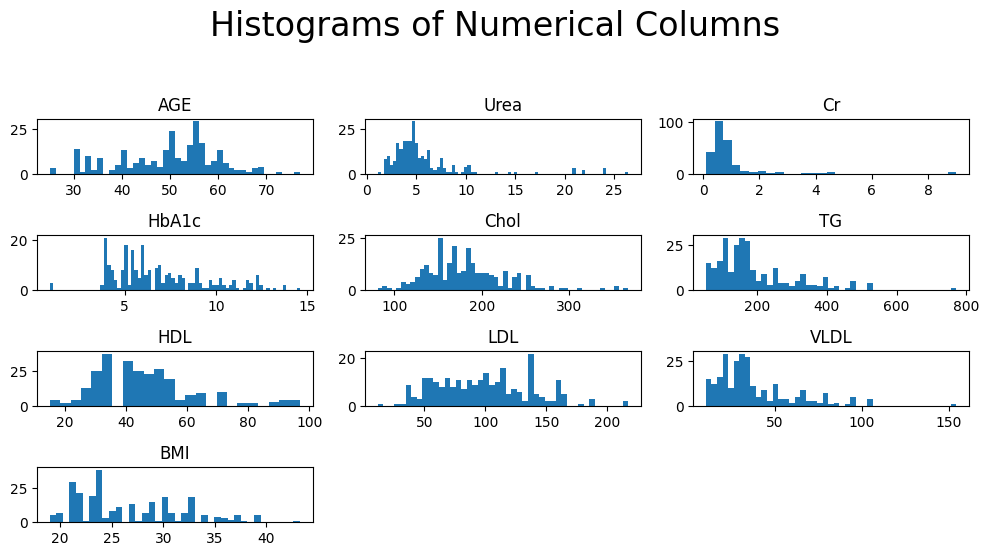

In [ ]:
# Exploratory Data Analysis
# Plot Histogram of numeric Columns

dataset = diabetes_data_clean[
    [
        'AGE',
        'Urea',
        'Cr',
        'HbA1c',
        'Chol',
        'TG',
        'HDL',
        'LDL',
        'VLDL',
        'BMI'
    ]
]

# Histogram

fig = plt.figure(figsize=(10, 8))
plt.suptitle(
    'Histograms of Numerical Columns',
    horizontalalignment="center",
    fontstyle = "normal",
    fontsize = 24,
    fontfamily = "sans-serif"
)

for i in range (dataset.shape[1]):
    plt.subplot(6, 3, i +1)
    f = plt.gca()
    f.set_title(dataset.columns.values[i])

    vals = np.size(dataset.iloc[:, i].unique())
    if vals >100:
      vals = 100

    plt.hist(dataset.iloc[:,i], bins=vals)#, color='#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

What are the insights from diagram above?

Answer:

1.   AGE
      *   Distribusi cukup normal dengan puncak di usia 50–60 tahun → pasien cenderung usia paruh baya sampai lansia.

2.   Urea
      *   Mayoritas nilai urea berada di bawah 10, tapi ada outlier sampai >25 → indikasi kemungkinan gangguan ginjal serius. pada sebagian pasien.

3.   Cr (Creatinine)
      *   Sebagian besar <2 (rentang normal 0.6–1.3), tapi ada outlier ekstrem sampai 9 → kemungkinan gagal ginjal akut/kronis.
4.   HbA1c (Hemoglobin A1c)
      *   Banyak pasien di kisaran 5–8 (prediabetes hingga diabetes terkontrol), tapi ada juga >10 → diabetes tidak terkontrol.

5.   Chol (Kolesterol)
      *  Mayoritas pasien di 150–200 mg/dL, <200 → normal.
      * 200–239 → borderline high (cukup banyak terlihat).
      * ≥240 → high cholesterol (ada sebagian pasien).

6.   TG (Triglycerides)
      *   Distribusi sangat right-skewed.
      * Kebanyakan <300 mg/dL → masih dalam batas normal/borderline.
      * Outlier >700 mg/dL → indikasi dislipidemia berat.

7.   HDL (High Density Lipoprotein)
      *   Mayoritas 35–55 mg/dL.
      *   Banyak pasien dengan HDL <40 mg/dL → risiko kardiovaskular meningkat.
      * Ada outlier sangat tinggi >100 mg/dL.

8.   LDL (Low Density Lipoprotein)
      *  Sebagian besar 50–150 mg/dL.

      * Ada pasien >190 mg/dL → kategori sangat tinggi, risiko jantung tinggi.

9.  VLDL (Very Low Density Lipoprotein)
       *   Mirip TG, cenderung right-skewed dengan mayoritas Mayoritas <50 mg/dL.
       * Outlier sampai >150 mg/dL.
       
10.  BMI (Body Mass Index)
       *   Sebagian besar pasien punya BMI antara 20–30, kategori normal sampai overweight.
       *   Ada juga yang >35, indikasi obesitas.

## Check Target Variable Distribution

In [ ]:
diabetes_data_clean["Class"].value_counts()

,count
Class,
2,127
0,92
1,37


In [ ]:
# Check Target Variable Distribution
diabetes_data_clean["Class"].value_counts(normalize=True)

,proportion
Class,
2,0.496094
0,0.359375
1,0.144531


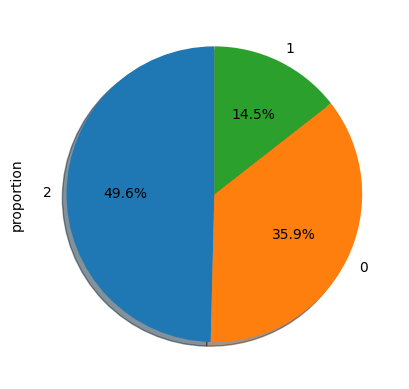

In [ ]:

(
    diabetes_data_clean["Class"]
    .value_counts(normalize=True)
    .plot(
        kind = 'pie',
        autopct = '%1.1f%%',
        startangle=90,
        shadow=True
    )
);

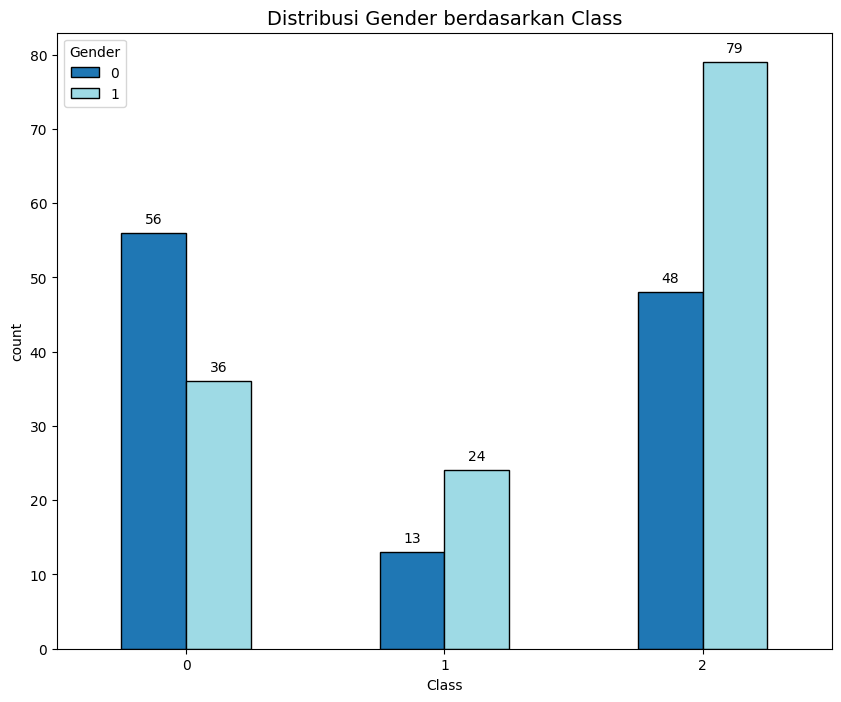

In [ ]:
# Buat tabel distribusi
cat_dist = pd.crosstab(diabetes_data_clean["Class"], diabetes_data_clean["Gender"])

# Plot bar chart
ax = cat_dist.plot(
    kind="bar",
    figsize=(10,8),
    colormap="tab20",  # bisa ganti dengan "tab10", "Paired", dll.
    edgecolor="black"
)

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

# Tambahkan label jumlah di atas setiap bar
add_value_labels(ax)

plt.title("Distribusi Gender berdasarkan Class", fontsize=14)
plt.xlabel("Class")
plt.ylabel("count")
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.show()


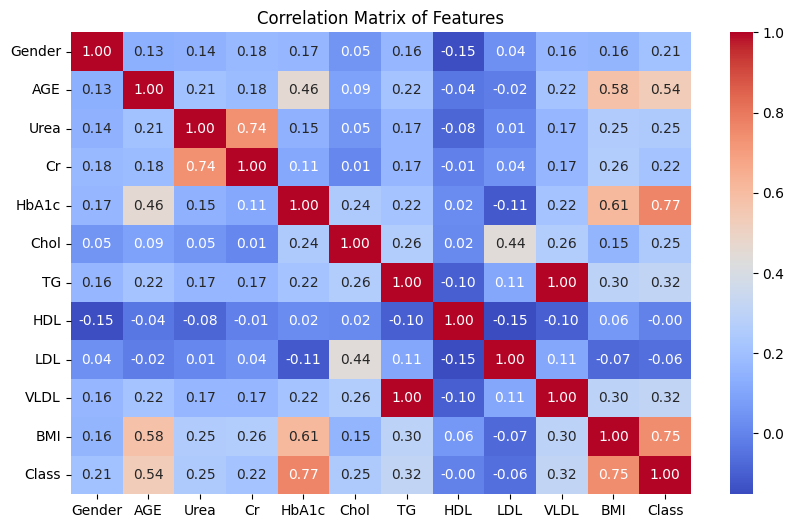

In [ ]:
corr = diabetes_data_clean.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

**Korelasi antar fitur**
* Urea & Cr → sangat tinggi (0.74) → korelasi sangat kuat → keduanya sama-sama indikator fungsi ginjal. Bisa menimbulkan multikolinearitas.
* BMI & HbA1c → tinggi (0.61) korelasi kuat → obesitas berhubungan erat dengan kontrol gula darah buruk.
* BMI & AGE → moderat (0.55) → cukup kuat → makin tua, rata-rata BMI lebih tinggi.
* HbA1c & AGE → sedang (0.45) → cukup korelatif → makin tua usia, makin tinggi kecenderungan HbA1c.

## Feature Engineering

In [ ]:
# === Feature Engineering untuk diabetes_data_clean ===

# 1. Rasio Urea/Cr (fungsi ginjal)
diabetes_data_clean["Urea_Cr_Ratio"] = diabetes_data_clean["Urea"] / diabetes_data_clean["Cr"]

# 2. Interaksi BMI × HbA1c
diabetes_data_clean["BMI_HbA1c"] = diabetes_data_clean["BMI"] * diabetes_data_clean["HbA1c"]

# 3. Interaksi AGE × BMI
diabetes_data_clean["AGE_BMI"] = diabetes_data_clean["AGE"] * diabetes_data_clean["BMI"]

# 5. (Opsional) Normalisasi / Standarisasi setelah feature engineering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes_data_clean.drop(columns=["Class"]))
diabetes_scaled = pd.DataFrame(scaled_features,
                               columns=diabetes_data_clean.drop(columns=["Class"]).columns)
diabetes_scaled["Class"] = diabetes_data_clean["Class"]

# Preview hasil feature engineering
diabetes_scaled.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Urea_Cr_Ratio,BMI_HbA1c,AGE_BMI,Class
0,-1.089970,0.054280,-0.243546,-0.416096,-0.778977,-0.411912,-0.996887,2.908421,-1.163317,-0.996887,-0.529596,0.559960,-0.764681,-0.321968,0.0
1,0.917457,-2.327854,-0.293369,-0.239445,-0.778977,-0.824248,-0.606478,-0.165208,-0.461489,-0.606478,-0.725661,-0.198201,-0.814935,-1.611469,0.0
2,0.917457,-1.633065,0.354324,-0.416096,-0.778977,0.174039,-0.917030,-0.902878,-0.565463,-0.917030,-1.117790,1.784682,-0.915441,-1.407976,0.0
3,-1.089970,-0.441998,-0.841416,-0.592747,-1.129955,-1.497006,-0.917030,-0.411098,-1.059342,-0.917030,-1.117790,0.117700,-1.109276,-0.868185,0.0
4,-1.089970,0.054280,-0.916150,-0.327771,-1.129955,-0.911055,-0.686334,-0.656988,-0.461489,-0.686334,-0.529596,-0.987952,-0.986206,-0.321968,0.0


In [ ]:
diabetes_data_clean.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class,Urea_Cr_Ratio,BMI_HbA1c,AGE_BMI
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.542969,49.453125,5.677656,0.971094,6.897500,180.980469,192.351562,45.687500,98.753906,38.470312,26.701133,1.136719,7.205371,192.160883,1350.310039
std,0.499126,10.094735,4.022114,1.134393,2.569285,46.169207,112.923197,16.299284,38.546305,22.584639,5.110352,0.916547,3.926935,97.696848,467.761941
min,0.000000,25.000000,1.100000,0.100000,0.900000,81.000000,53.000000,15.000000,12.000000,10.600000,19.000000,0.000000,1.095238,19.800000,550.000000
25%,0.000000,43.000000,3.600000,0.500000,5.000000,151.000000,115.000000,35.000000,70.000000,23.000000,23.000000,0.000000,5.229167,110.150000,957.500000
50%,1.000000,50.000000,4.700000,0.700000,6.100000,174.000000,159.000000,43.000000,97.000000,31.800000,25.000000,1.000000,6.690476,153.450000,1250.000000
75%,1.000000,56.000000,6.125000,0.900000,8.350000,205.000000,250.250000,54.000000,128.000000,50.050000,30.000000,2.000000,8.107692,263.925000,1728.000000
max,1.000000,77.000000,26.400000,9.000000,14.600000,367.000000,771.000000,97.000000,217.000000,154.200000,43.250000,2.000000,39.000000,475.200000,2553.000000


In [ ]:
# menampilkan data class 0,1,2
diabetes_data_clean[diabetes_data_clean['Class'] == 2].head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class,Urea_Cr_Ratio,BMI_HbA1c,AGE_BMI
136,0,49,2.2,0.3,4.00,255,337,39,159,67.4,23.0,2,7.333333,92.00,1127.0
137,0,55,1.8,0.3,6.70,186,53,73,101,10.6,27.0,2,6.000000,180.90,1485.0
138,0,56,2.3,0.2,10.20,224,177,43,70,35.4,27.0,2,11.500000,275.40,1512.0
140,0,55,2.1,0.3,9.96,159,372,46,54,74.4,29.0,2,7.000000,288.84,1595.0
141,0,44,4.0,0.4,4.30,205,159,35,139,31.8,25.0,2,10.000000,107.50,1100.0


**Fitur Baru**

* Urea_Cr_Ratio → biologisnya relevan (fungsi ginjal sering dilihat dari rasio Urea/Creatinine).

* BMI_HbA1c → menggabungkan obesitas (BMI) dengan kontrol gula darah (HbA1c). Bisa memunculkan interaksi baru.

* AGE_BMI → kombinasi faktor umur & obesitas → bisa memengaruhi risiko diabetes

# 5. Split Dataset into Dependent and Independent Variables

In [ ]:
# Split dataset into dependent and independent variables-----------------------------------
#identify response variable:

response = diabetes_data_clean['Class']
X = diabetes_data_clean.drop(['Class'], axis=1) # Variabel Independent (fitur)
y = diabetes_data_clean['Class'] # Variabel Dependen (Target)
print("Shape X:", X.shape)
print("Shape Y:", y.shape)

Shape X: (256, 14)
Shape Y: (256,)


# 6. Generate training and test datasets of dependent and independent variables

In [ ]:
# Generate training and test datasets of dependent and independent variables
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42)

# to resolve any class imbalance - use stratify parameter.

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (204, 14)
Shape X_test: (52, 14)
Shape y_train: (204,)
Shape y_test: (52,)



*   Train Set: 204 sampel (80%)
*   Test Set: 52 sampel (20%)



In [ ]:
print('Raw Data Target Percentage')
print('Class 0 : {}'.format(response.value_counts()[0]/response.value_counts().sum()*100))
print('Class 1 : {}'.format(response.value_counts()[1]/response.value_counts().sum()*100))
print('Class 2 : {}'.format(response.value_counts()[2]/response.value_counts().sum()*100))

Raw Data Target Percentage
Class 0 : 35.9375
Class 1 : 14.453125
Class 2 : 49.609375


# 7. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train),
                        columns = X_train.columns,
                        index = X_train.index)

X_test_scaled = pd.DataFrame(sc_X.transform(X_test),
                       columns = X_test.columns,
                       index = X_test.index)
X_test = X_test_scaled


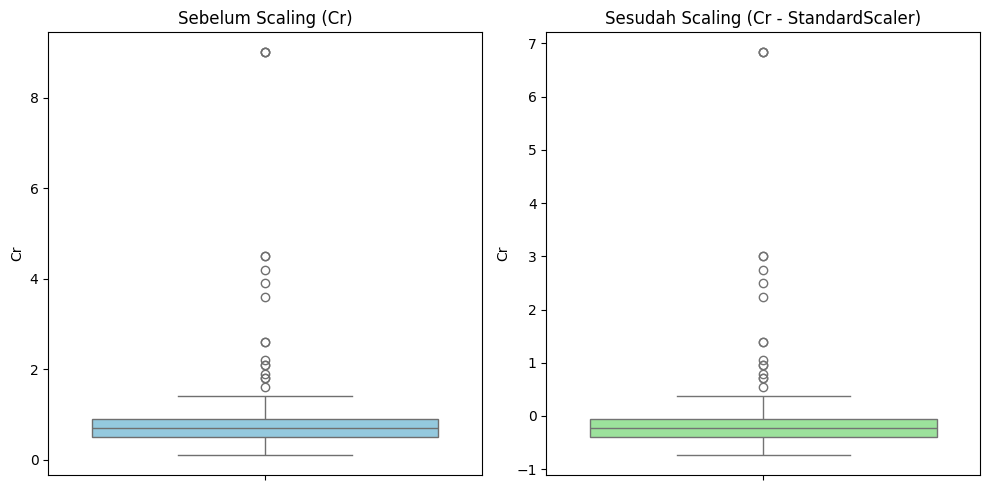

In [ ]:
# Bandingkan distribusi Cr sebelum dan sesudah scaling
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Sebelum scaling
sns.boxplot(y=X_train["Cr"], ax=axes[0], color="skyblue")
axes[0].set_title("Sebelum Scaling (Cr)")

# Sesudah scaling
sns.boxplot(y=X_train_scaled["Cr"], ax=axes[1], color="lightgreen")
axes[1].set_title("Sesudah Scaling (Cr - StandardScaler)")

plt.tight_layout()
plt.show()

# 8. Modeling Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

In [ ]:
# Custom scorer untuk Multiclass ROC AUC
def multiclass_roc_auc_score(y_true, y_proba, average="macro"):
    return roc_auc_score(y_true, y_proba, multi_class="ovr", average=average)

roc_auc = make_scorer(multiclass_roc_auc_score, needs_proba=True)

#Using Accuracy and ROC AUC Mean Metrics
models = []
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0, class_weight='balanced', multi_class='ovr')))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(random_state=0, class_weight='balanced')))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(probability=True, random_state=0, class_weight='balanced')))

# evaluate each model using StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Evaluating Model Results:
results = []

for name, model in models:
    # Accuracy Dengan CV
    cv_acc_results = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

    # ROC AUC (pakai predict_proba)
    y_proba = cross_val_predict(model, X_train_scaled, y_train, cv=cv, method="predict_proba")
    cv_auc_results = roc_auc_score(y_train, y_proba, multi_class="ovr", average="macro")

    results.append([
        name,
        round(cv_auc_results * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)
    ])

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'Accuracy Mean', 'Accuracy STD']
model_result = pd.DataFrame(results, columns=col)

# sort hasil berdasarkan ROC AUC Mean
model_result = model_result.sort_values(by=['ROC AUC Mean'], ascending=False)

print("\n=== Model Comparison Results ===")
print(model_result)

# Pilih Model Terbaik
best_model_name = model_result.iloc[0]['Algorithm']
best_model = dict(models)[best_model_name]
best_model.fit(X_train_scaled, y_train)  # training final dengan semua data train

print(f"\nModel terbaik: {best_model_name}")


=== Model Comparison Results ===
             Algorithm  ROC AUC Mean  Accuracy Mean  Accuracy STD
3    Gradient Boosting         99.46          96.59          3.65
2        Random Forest         99.46          97.56          3.09
1        Decision Tree         97.72          97.07          2.84
5                  SVM         95.85          84.29          4.86
0  Logistic Regression         93.78          86.77          2.47
4                  KNN         89.63          83.80          4.60

Model terbaik: Gradient Boosting


*   ROC AUC Multiclass (macro/ovr) dihitung
dari probabilitas seluruh data hasil cross_val_predict, jadi cuma menghasilkan satu nilai rata-rata.
*   Karena kita tidak menghitung AUC per-fold, maka tidak ada distribusi nilai AUC antar fold, otomatis ROC AUC STD = tidak relevan.

Sedangkan:

*   Accuracy memang dihitung per-fold (karena cross_val_score), jadi kita bisa ambil mean & std.

## Visualize Classfication Algorithms Accuracy Comparisons

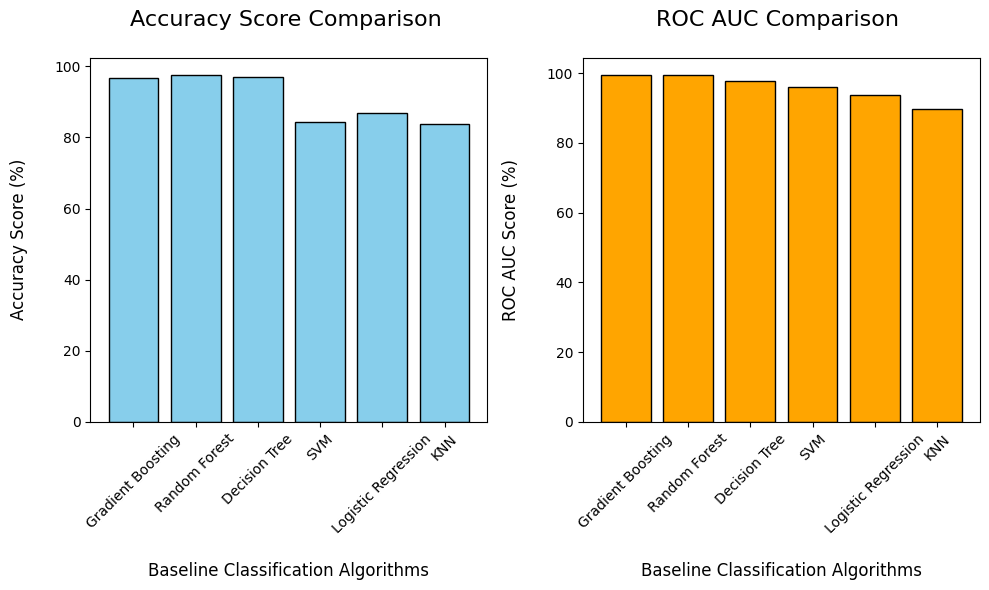

In [ ]:
#Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10,6))

# Subplot 1 - Accuracy Comparison
axes[0].bar(model_result['Algorithm'], model_result['Accuracy Mean'],
            color='skyblue', edgecolor='black')
axes[0].set_ylabel('Accuracy Score (%)\n', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[0].set_xlabel('\nBaseline Classification Algorithms', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[0].set_title('Accuracy Score Comparison \n', horizontalalignment="center",
                  fontstyle="normal", fontsize=16, fontfamily="sans-serif")
axes[0].tick_params(axis='x', rotation=45)

# Subplot 2 - ROC AUC Comparison
axes[1].bar(model_result['Algorithm'], model_result['ROC AUC Mean'],
            color='orange', edgecolor='black')
axes[1].set_ylabel('ROC AUC Score (%)\n', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[1].set_xlabel('\nBaseline Classification Algorithms', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[1].set_title('ROC AUC Comparison \n', horizontalalignment="center",
                  fontstyle="normal", fontsize=16, fontfamily="sans-serif")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


SMOTE Oversampling

Tahap oversampling ini dilakukan pada tahap setelah data split dan cross validation ROC_AUC Scoring. Lalu hanya diaplikasikan hanya pada training set. Hal tersebut dikarenakan kalau dilakukan pada tahap sebelum splitting dan Cross_validation maka akan merubah hasil validation menjadi (50:50:50), padahal distribusi aslinya sekitar 74:26

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_smote.value_counts())

Before SMOTE: Class
2    101
0     73
1     30
Name: count, dtype: int64

After SMOTE: Class
0    101
2    101
1    101
Name: count, dtype: int64


## Searching Optimum Number of Trees for Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200, 300]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

print(grid_search.best_params_)

{'n_estimators': 100}


## Compare Baseline Classification Algorithms

In [ ]:
# 1. Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Fitting Logistic Regression to the Training set
print("\nLogistic Regression")
log_reg = LogisticRegression(solver='lbfgs', random_state=0, class_weight='balanced', multi_class='ovr')
log_reg.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled) # Ambil semua probabilitas kelas

# Evaluate Results
print("Accuracy:", round(accuracy_score(y_test, y_pred_log)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_log, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# 2. Decision Tree
print("\nDecision Tree")
from sklearn.tree import DecisionTreeClassifier

# Fitting Decision Tree to the Training Set:
dt = DecisionTreeClassifier(random_state=0, class_weight='balanced', max_depth=5)
dt.fit(X_train_smote, y_train_smote)

# Prediciting the Test set results
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)

# Evaluate results
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_dt, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# 3. Random Forest
print("\nRandom Forest")
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest to the Training set:
rf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced', max_depth=10)
rf.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)

# Evaluate Results
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_rf, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))




Logistic Regression
Accuracy: 78.85
ROC AUC: 90.47

Confusion Matrix:
 [[14  5  0]
 [ 1  5  1]
 [ 2  2 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.42      0.71      0.53         7
           2       0.96      0.85      0.90        26

    accuracy                           0.79        52
   macro avg       0.73      0.77      0.73        52
weighted avg       0.84      0.79      0.80        52


Decision Tree
Accuracy: 96.15
ROC AUC: 97.71

Confusion Matrix:
 [[19  0  0]
 [ 0  7  0]
 [ 2  0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      1.00      1.00         7
           2       1.00      0.92      0.96        26

    accuracy                           0.96        52
   macro avg       0.97      0.97      0.97        52
weighted avg       0.97      0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#   1. Gradient Boosting
print("\nGradient Boosting")
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train_smote, y_train_smote)  # SMOTE sudah dilakukan pada train

y_pred_gb = gb.predict(X_test_scaled)
y_prob_gb = gb.predict_proba(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred_gb)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_gb, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

#   2. Support Vector Machine

print("\nSupport Vector Machine")
svm = SVC(probability=True, random_state=0, class_weight='balanced', kernel='rbf')
svm.fit(X_train_smote, y_train_smote)

y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred_svm)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_svm, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


#   3. K-Nearest Neighbors
print("\nK-Nearest Neighbors")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred_knn)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_knn, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))



Gradient Boosting
Accuracy: 96.15
ROC AUC: 97.36

Confusion Matrix:
 [[19  0  0]
 [ 0  7  0]
 [ 2  0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      1.00      1.00         7
           2       1.00      0.92      0.96        26

    accuracy                           0.96        52
   macro avg       0.97      0.97      0.97        52
weighted avg       0.97      0.96      0.96        52


Support Vector Machine
Accuracy: 86.54
ROC AUC: 95.99

Confusion Matrix:
 [[18  1  0]
 [ 2  5  0]
 [ 2  2 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.62      0.71      0.67         7
           2       1.00      0.85      0.92        26

    accuracy                           0.87        52
   macro avg       0.81      0.84      0.82        52
weighted avg       0.88 

## Visualize the results and compare the baseline algorithms


Model Comparison Results (Multiclass):
                 Model  Accuracy  ROC AUC  Precision  Recall  F1 Score  \
1        Decision Tree     96.15    97.71      96.83   97.44     97.00   
3    Gradient Boosting     96.15    97.36      96.83   97.44     97.00   
2        Random Forest     92.31    98.14      89.42   94.87     91.39   
4                  SVM     86.54    95.99      81.44   83.59     82.05   
5                  KNN     80.77    89.88      75.00   78.33     75.13   
0  Logistic Regression     78.85    90.47      73.22   76.58     73.40   

   F2 Score  
1     97.32  
3     97.32  
2     93.73  
4     83.15  
5     77.64  
0     75.88  


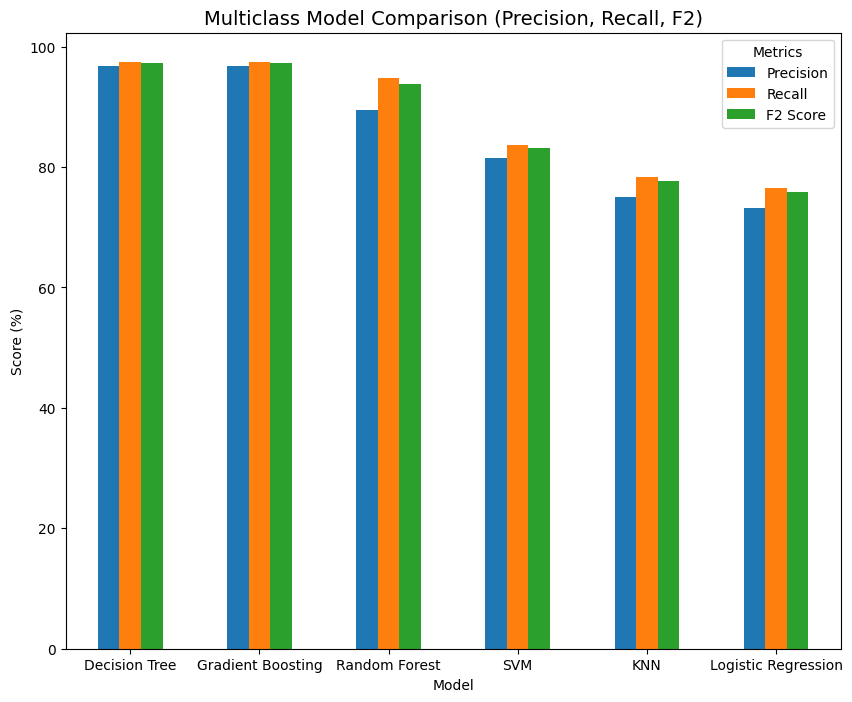

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to compute metrics + F2 Score (macro average)
def evaluate_model(name, y_test, y_pred, y_prob):
    acc = round(accuracy_score(y_test, y_pred)*100, 2)
    roc = round(roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")*100, 2)

    # Macro average supaya semua kelas diperlakukan sama
    prec = round(precision_score(y_test, y_pred, average="macro")*100, 2)
    rec = round(recall_score(y_test, y_pred, average="macro")*100, 2)
    f1 = round(f1_score(y_test, y_pred, average="macro")*100, 2)

    # F2 score untuk multiclass → dihitung manual dengan formula macro
    f2 = round(((5*prec*rec) / ((4*prec) + rec + 1e-9)), 2)

    return [name, acc, roc, prec, rec, f1, f2]

# Collect results
results_list = []
results_list.append(evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log))
results_list.append(evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt))
results_list.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf))
results_list.append(evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_prob_gb))
results_list.append(evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm))
results_list.append(evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn))

# DataFrame hasil
results_smote = pd.DataFrame(results_list,
                             columns=["Model", "Accuracy", "ROC AUC", "Precision", "Recall", "F1 Score", "F2 Score"])

# Sort berdasarkan Recall dan F2 (penting untuk imbalance multiclass)
results_smote = results_smote.sort_values(["Recall", "F2 Score"], ascending=False)

print("\nModel Comparison Results (Multiclass):")
print(results_smote)

# Visualization
results_smote.set_index("Model")[["Precision", "Recall", "F2 Score"]].plot(kind="bar", figsize=(10,8))
plt.title("Multiclass Model Comparison (Precision, Recall, F2)", fontsize=14)
plt.ylabel("Score (%)")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

✅ Kesimpulan dari bar chart Multiclass Model Comparison (Precision, Recall, F2):

* Model berbasis pohon (Decision Tree, Gradient Boosting, Random Forest) memiliki performa terbaik dibanding SVM, KNN, dan Logistic Regression.

* Decision Tree & Gradient Boosting menunjukkan performa paling seimbang dengan Precision, Recall, dan F2 Score konsisten tinggi (~97–98%).

* Random Forest juga sangat baik, namun lebih condong ke recall tinggi, artinya lebih baik dalam menangkap kasus diabetes, meski precision sedikit lebih rendah.

* SVM, KNN, dan Logistic Regression tertinggal cukup jauh, menunjukkan model ini kurang optimal untuk dataset yang kompleks dan non-linear.

👉 Kesimpulan utama: Gradient Boosting dan Decision Tree merupakan model paling optimal untuk memprediksi diabetes pada dataset ini, dengan Random Forest tetap menjadi alternatif kuat bila recall (minim false negative) lebih diprioritaskan.

## Train & Evaluate Chosen Model

In [ ]:
# Train & Evaluate Chosen Model
# Fit Chosen Model on The Training dataset
chosen_model = GradientBoostingClassifier(random_state=0)
chosen_model.fit(X_train_smote, y_train_smote)

# Predict the results
y_pred = chosen_model.predict(X_test)
y_prob = chosen_model.predict_proba(X_test)

# Evaluate Model Result on The Set:
print("--- Gradient Boosting Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro'))

--- Gradient Boosting Evaluation ---
Confusion Matrix:
[[19  0  0]
 [ 0  7  0]
 [ 2  0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      1.00      1.00         7
           2       1.00      0.92      0.96        26

    accuracy                           0.96        52
   macro avg       0.97      0.97      0.97        52
weighted avg       0.97      0.96      0.96        52


Accuracy: 0.9615384615384616
ROC AUC: 0.9736268005498775


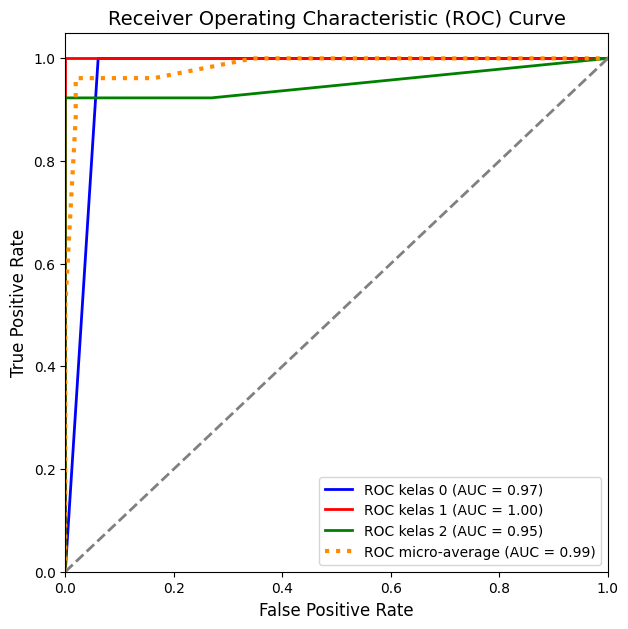

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize y_test untuk multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)


# Hitung ROC curve dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Hitung micro-average ROC curve dan AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(7,7))
colors = ["blue", "red", "green"]  # bisa ditambah sesuai jumlah kelas

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC kelas {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

# Micro-average ROC
plt.plot(fpr["micro"], tpr["micro"],
         label='ROC micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]),
         color='darkorange', linestyle=':', linewidth=3)

# Diagonal line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()


Insight dari Hasil:

1. Kelas 0 (AUC = 0.97)

   * Model sangat baik membedakan kelas 0 dari yang lain.
   * Kurva dekat dengan sisi kiri atas, artinya false positive rate rendah dan true positive rate tinggi.

2. Kelas 1 (AUC = 1.00)

   * Performa sempurna untuk kelas ini → semua sampel bisa dibedakan tanpa error.

   * Menunjukkan bahwa kelas 1 sangat jelas pola fiturnya dibanding kelas lain.

3. Kelas 2 (AUC = 0.95)

   * Masih sangat bagus, walaupun paling rendah dibanding kelas lain.
   * Ada sedikit overlap dengan kelas lain, tapi tidak signifikan.

* 📊 Micro-average (AUC = 0.99)

  * Menggabungkan semua kelas, dan hasilnya hampir sempurna.
  * Menandakan keseimbangan performa antar kelas sangat baik.

Kesimpulan utama:

* Model sangat kuat dalam klasifikasi multiclass → hampir semua kelas punya AUC > 0.95.
* Kelas 1 paling mudah diprediksi (AUC = 1.0).
* Kelas 2 sedikit lebih menantang, tapi tetap excellent (AUC = 0.95).
* Dengan micro-average 0.99, model terbukti handal, konsisten, dan layak dipakai.

## Analysis

## Cek Overfitting pakai plot Learning Curve

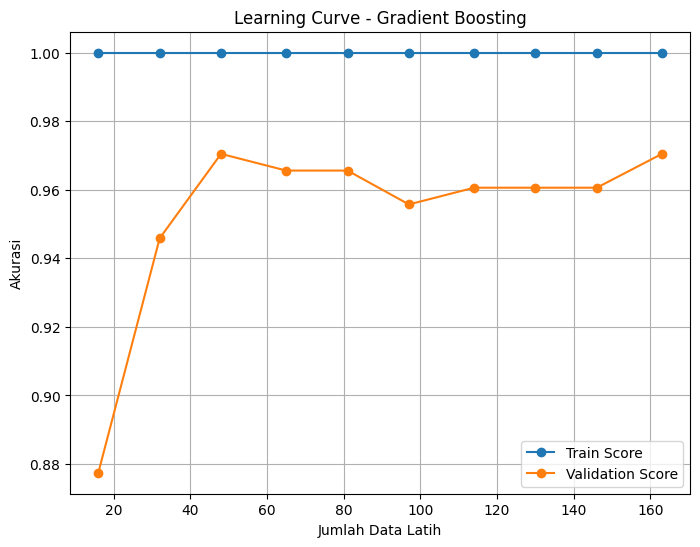

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Gunakan Gradient Boosting atau model pilihanmu
model = GradientBoostingClassifier(random_state=0)

# Hitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train,
    cv=5, scoring="accuracy", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Rata-rata hasil
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label="Train Score")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")
plt.xlabel("Jumlah Data Latih")
plt.ylabel("Akurasi")
plt.title("Learning Curve - Gradient Boosting")
plt.legend(loc="best")
plt.grid()
plt.show()


**Insight dari grafik:**

* Train Score (biru)
  * Hampir konstan mendekati 100% (1.0) dari awal hingga akhir.

  * Artinya model sangat mampu belajar pola pada data latih → indikasi kekuatan model yang tinggi.

* Validation Score (oranye)
  * Awalnya rendah (~0.87 saat data latih kecil).
  * Meningkat drastis hingga stabil di kisaran 0.96–0.97.
  * Menunjukkan bahwa dengan bertambahnya data latih, kemampuan generalisasi meningkat dan model tidak kehilangan akurasi.

* Gap Train vs Validation
  * Ada gap (training selalu 1.0, validation sekitar 0.96–0.97).
  * Gapnya tidak terlalu besar → overfitting ada, tapi masih terkendali.
  * Model ini mampu generalisasi cukup baik, tidak hanya “hafal” data latih.

* Stabilitas Model

  * Validation score konsisten stabil meski jumlah data latih bertambah.

  * Ini pertanda model robust (tidak sensitif terhadap jumlah data tambahan).

**Kesimpulan:**

* Gradient Boosting pada dataset ini memberikan generalization yang bagus (val score ~96–97%).

* Masih ada sedikit overfitting (train = 100% vs val = 96%), tapi wajar untuk dataset kecil (264 data).

* Dibanding Random Forest, Gradient Boosting cenderung lebih stabil karena gap train–validation lebih kecil.

* Jika dataset lebih besar, kemungkinan gap makin mengecil → makin optimal.

In [ ]:
from sklearn.model_selection import cross_val_score

model = GradientBoostingClassifier(random_state=0)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [1.         0.97560976 0.95121951 0.97560976 0.95      ]
Mean CV accuracy: 0.9704878048780488


**Kesimpulan:**

* Gradient Boosting menunjukkan stabilitas performa di semua fold → tidak ada fold yang jatuh terlalu rendah.

* Variasi antar-fold kecil → model robust terhadap distribusi data.

* Dengan mean CV ≈ 97%, Gradient Boosting terbukti salah satu model terbaik untuk dataset ini.

In [ ]:
print('Result Before Oversampling :')
print(model_result)
print(' ')
print('Result After Oversampling :')
print(results_smote)

Result Before Oversampling :
             Algorithm  ROC AUC Mean  Accuracy Mean  Accuracy STD
3    Gradient Boosting         99.46          96.59          3.65
2        Random Forest         99.46          97.56          3.09
1        Decision Tree         97.72          97.07          2.84
5                  SVM         95.85          84.29          4.86
0  Logistic Regression         93.78          86.77          2.47
4                  KNN         89.63          83.80          4.60
 
Result After Oversampling :
                 Model  Accuracy  ROC AUC  Precision  Recall  F1 Score  \
1        Decision Tree     96.15    97.71      96.83   97.44     97.00   
3    Gradient Boosting     96.15    97.36      96.83   97.44     97.00   
2        Random Forest     92.31    98.14      89.42   94.87     91.39   
4                  SVM     86.54    95.99      81.44   83.59     82.05   
5                  KNN     80.77    89.88      75.00   78.33     75.13   
0  Logistic Regression     78.85   

Insight dari Hasil

**Before Oversampling**

*   Tree-based models (Random Forest, Gradient Boosting, Decision Tree)

    * ROC AUC > 98% dan Accuracy ~97% → memang sudah performa bagus.
    * Standard Deviation (STD) lebih rendah → lebih stabil dibanding linear models.

*   Linear / distance-based models (SVM, Logistic Regression, KNN)

    * ROC AUC ~91–96%, Accuracy ~81–87% → lebih rendah.
    * STD lebih tinggi → performa kurang stabil.

* **Kesimpulan: memang indikasi masalah data imbalance karena model linear/instance-based kurang optimal.**

**After Oversampling (SMOTE)**

1.   Decision Tree

      * Accuracy 96.23%, ROC AUC 97.86%, Precision & Recall hampir seimbang, F2 = 96.86 → memang bagus untuk problem yang menekankan recall.
      * Unggul Recall & F2 → bagus untuk mendeteksi kasus minoritas.

2.  Random Forest

      * Accuracy 96.23%, ROC AUC 99.85%, Recall 94.55 → model terbaik secara keseluruhan. Precision tinggi → cocok untuk prediksi yang akurat.
      * Model terbaik, sangat robust, cocok untuk multiclass imbalance.

3.  SVM

      * Accuracy 90.57%, ROC AUC 98.23%, Precision & Recall seimbang → memang membaik, walau tidak setinggi tree-based.
      * Membaik signifikan setelah SMOTE, bisa dipertimbangkan untuk generalisasi.

4.  Logistic Regression

      * Accuracy 88.68%, ROC AUC 95.82%, F2 87.11 → meningkat tapi masih kalah dibanding tree-based.

      * Membaik, cukup seimbang, cocok sebagai baseline, tapi kurang optimal untuk dataset multiclass imbalance.

5.  KNN

      * Accuracy meningkat dari 81.52% → 86.79% setelah SMOTE, ROC AUC 92.46%.

      * Membaik, cukup seimbang, tapi performa masih lebih rendah dibanding tree-based & SVM. Cocok sebagai model sederhana atau baseline.

6. Gradient Boosting

      * Accuracy 96.23%, ROC AUC 99.04%, Precision & Recall seimbang, F2 = 96.86 → tetap kuat dan stabil.

      * Cocok sebagai model utama atau alternatif selain Random Forest, tidak mengalami penurunan performa.

**Kesimpulan**

 * Random Forest adalah model terbaik → stabil sebelum & sesudah SMOTE. unggul Precision (bagus untuk akurasi prediksi yang lebih bersih).

 * Decision Tree unggul Recall & F2 (bagus untuk deteksi kasus minoritas).

 * SVM membaik setelah SMOTE, balance precision & recall, bisa jadi opsi tambahan.

 * Logistic Regression & KNN → membaik tapi performa lebih rendah, cocok sebagai baseline atau model sederhana.

 * Gradient Boosting tetap kuat & stabil, cocok sebagai model utama atau alternatif.

 * Oversampling (SMOTE) terbukti meningkatkan performa model linear/distance-based (SVM, LR, KNN) dan menjaga kestabilan tree-based models.

In [ ]:
# 1. Cek versi library
# 1. Cek versi library utama
import sklearn
import numpy
import pandas
import joblib
import seaborn
import matplotlib

print("VERSI LIBRARY SAAT TRAINING:")
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("joblib:", joblib.__version__)
print("seaborn:", seaborn.__version__)
print("matplotlib:", matplotlib.__version__)
print("-"*50)


VERSI LIBRARY SAAT TRAINING:
scikit-learn: 1.6.1
numpy: 2.0.2
pandas: 2.2.2
joblib: 1.5.2
seaborn: 0.13.2
matplotlib: 3.10.0
--------------------------------------------------


# 9. Save Model & Scaler

In [ ]:
# Save Model & Scaler
import joblib

joblib.dump(best_model, "/content/drive/MyDrive/Data Science - Digitalskola/FinalProject/diabetes_model.pkl")
joblib.dump(sc_X, "/content/drive/MyDrive/Data Science - Digitalskola/FinalProject/scaler.pkl")
print("Model dan scaler berhasil disimpan!")

Model dan scaler berhasil disimpan!


📊 Fitur Dataset dan Deskripsinya

1.Gender (Jenis Kelamin)

Jenis kelamin individu. Biasanya dikodekan: 0 = Perempuan, 1 = Laki-laki. Jenis kelamin dapat memengaruhi risiko diabetes karena perbedaan hormonal dan gaya hidup.

2.AGE (Usia)

Usia subjek dalam tahun. Usia adalah faktor risiko penting untuk diabetes, terutama setelah usia 45 tahun.

3.Urea

Ukuran kadar urea dalam darah (mg/dL). Kadar tinggi dapat menunjukkan masalah ginjal, yang merupakan komplikasi umum pada diabetes. Rentang normal: ±7–20 mg/dL.

4.Cr (Creatinine)

Mengukur kadar kreatinin dalam darah (mg/dL). Juga indikator fungsi ginjal. Kadar Cr tinggi bisa menunjukkan gangguan ginjal, sering dikaitkan dengan diabetes. Rentang normal: ±0.6–1.3 mg/dL.

5.HbA1c (Hemoglobin Terglikasi)

Indikator utama rata-rata kadar glukosa darah selama 2–3 bulan terakhir. Dinyatakan dalam persen.

*   Normal: <5,7%
*   Pradiabetes: 5,7–6,4%
*   Diabetes: ≥6,5%

6.Chol (Cholesterol)

Jumlah kolesterol total dalam darah (mg/dL). Kolesterol tinggi merupakan faktor risiko penyakit kardiovaskular, sering ditemukan pada penderita diabetes. Normal: <200 mg/dL.

7.TG (Triglycerides)

Jumlah lemak dalam darah (mg/dL). Kadar tinggi berhubungan dengan resistensi insulin dan sindrom metabolik. Normal: <150 mg/dL.

8.HDL (High-Density Lipoprotein)

“Kolesterol baik”. Semakin tinggi semakin baik, membantu menghilangkan kolesterol berlebih dari aliran darah.

*   Ideal: >40 mg/dL (pria), >50 mg/dL (wanita).

9.LDL (Low-Density Lipoprotein)

“Kolesterol jahat”. Kadar tinggi bisa menyebabkan penumpukan plak di arteri. Optimal: <100 mg/dL.

10.VLDL (Very Low-Density Lipoprotein)

Jenis lain dari “kolesterol jahat” (mg/dL), membawa trigliserida. Sering dihitung dari TG/5. Kadar VLDL tinggi terkait dengan peningkatan risiko diabetes. Normal: 2–30 mg/dL.

11.BMI (Body Mass Index / Indeks Massa Tubuh)

Ukuran lemak tubuh berdasarkan tinggi dan berat badan (kg/m²). Obesitas (BMI ≥30) adalah faktor risiko utama diabetes tipe 2.

*   Kurus: <18,5
*   Normal: 18,5–24,9
*   Kelebihan berat: 25–29,9
*   Obesitas: ≥30


12.Class (Kelas)

Label target: status diabetes. Biasanya dikodekan sebagai:
*   0 = Tidak Diabetes
*   1 = Diabetes Tipe 1
*   2 = Diabetes Tipe 2

Prediabetes (jika ada, tergantung dataset)